In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parulpandey/palmer-archipelago-antarctica-penguin-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\dima\.cache\kagglehub\datasets\parulpandey\palmer-archipelago-antarctica-penguin-data\versions\1


In [32]:
df = pd.read_csv("C:\\Users\\dima\\.cache\\kagglehub\\datasets\\parulpandey\\palmer-archipelago-antarctica-penguin-data\\versions\\1\\penguins_lter.csv", sep = ',')
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [33]:
df = df.drop('Comments', axis=1)
df = df.drop('Region', axis=1)
df = df.drop('Stage', axis=1)

df = df.dropna()
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,64.756923,44.054769,17.123077,201.264615,4216.000000,8.737794,-25.690217
std,40.269302,5.472226,1.965942,13.964598,808.859222,0.552581,0.790098
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,31.000000,39.500000,15.600000,190.000000,3550.000000,8.302310,-26.326010
50%,60.000000,44.900000,17.300000,197.000000,4050.000000,8.658030,-25.852030
75%,97.000000,48.700000,18.600000,213.000000,4800.000000,9.180210,-25.060200
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.890170


In [34]:
vals=df['Island'].unique()
vals

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [35]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[['studyName', 'Species', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Sex']] = enc.fit_transform(df[['studyName', 'Species' ,'Individual ID', 'Clutch Completion', 'Date Egg', 'Sex']])
df.head()

,studyName,Sample Number,Species,Island,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,0.0,2,0.0,Torgersen,23.0,1.0,3.0,39.5,17.4,186.0,3800.0,1.0,8.94956,-24.69454
2,0.0,3,0.0,Torgersen,43.0,1.0,15.0,40.3,18.0,195.0,3250.0,1.0,8.36821,-25.33302
4,0.0,5,0.0,Torgersen,65.0,1.0,15.0,36.7,19.3,193.0,3450.0,1.0,8.76651,-25.32426
5,0.0,6,0.0,Torgersen,66.0,1.0,15.0,39.3,20.6,190.0,3650.0,2.0,8.66496,-25.29805
6,0.0,7,0.0,Torgersen,87.0,0.0,12.0,38.9,17.8,181.0,3625.0,1.0,9.18718,-25.21799


In [36]:
df['Island'] = df.pop('Island')
df.columns


Index(['studyName', 'Sample Number', 'Species', 'Individual ID',
       'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Island'],
      dtype='object')

In [37]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X = df.iloc[:, :15]
df['Island'] = df["Island"].replace(vals, [0, 1, 2])
y = df['Island']

C:\Users\dima\AppData\Local\Temp\ipykernel_9528\1685868934.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Island'] = df["Island"].replace(vals, [0, 1, 2])


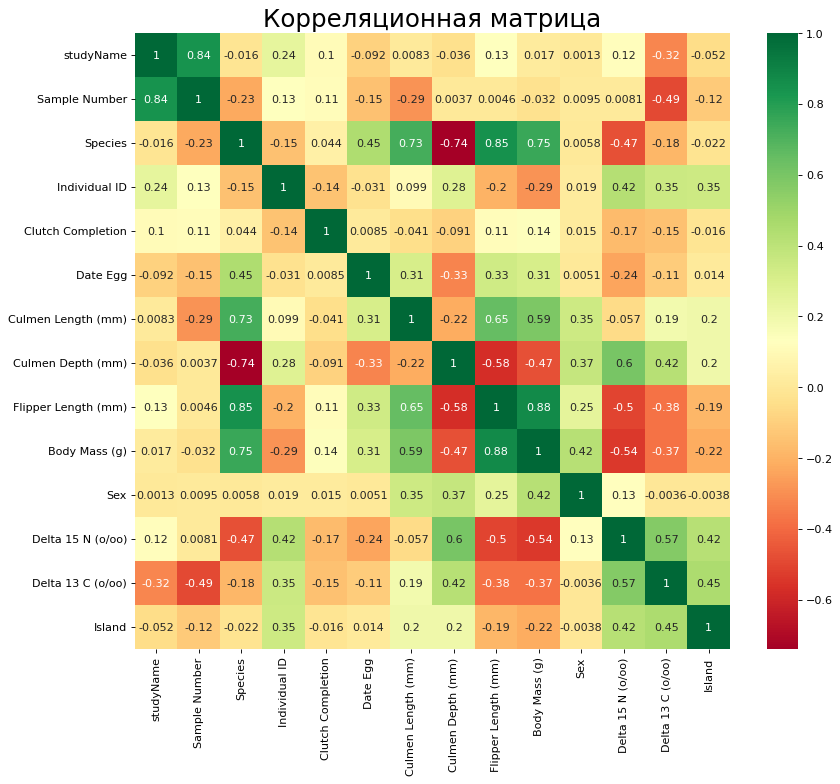

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', annot=True)
plt.title('Корреляционная матрица', fontsize=22)
plt.show()

In [39]:
cols_cl = ['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Date Egg', 'Individual ID', 'Culmen Length (mm)', 'Culmen Depth (mm)']
X_ = X[cols_cl]
X_sc = pd.DataFrame(scaler.fit_transform(X_), columns=cols_cl)

# PCA

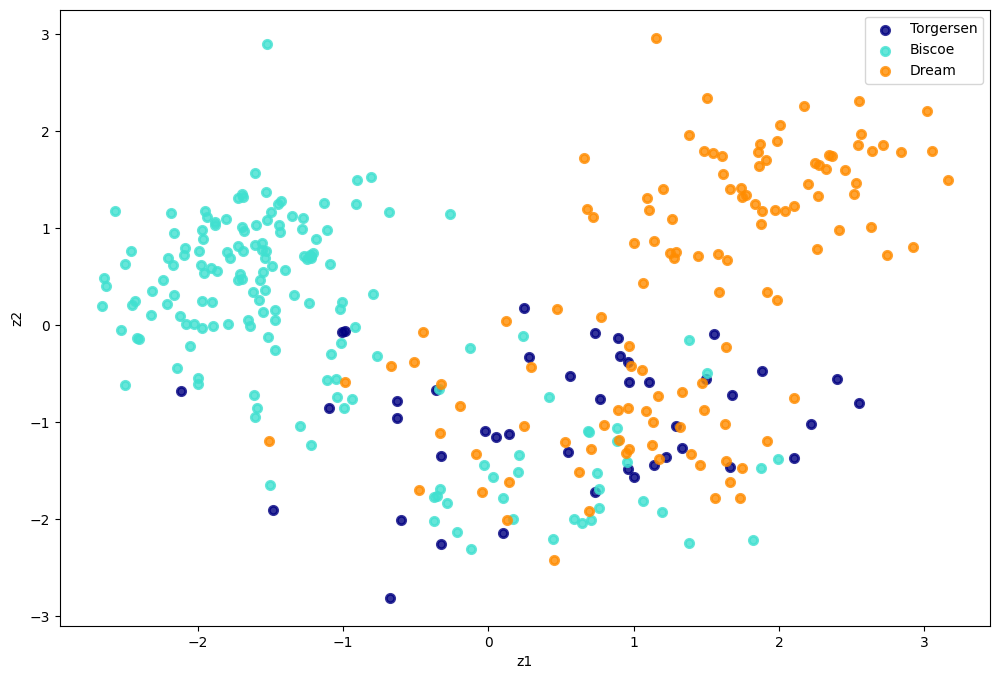

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit(X_sc).transform(X_sc)


plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_cl):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [41]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.40762574 0.23695645]
0.644582197913279


# ICA

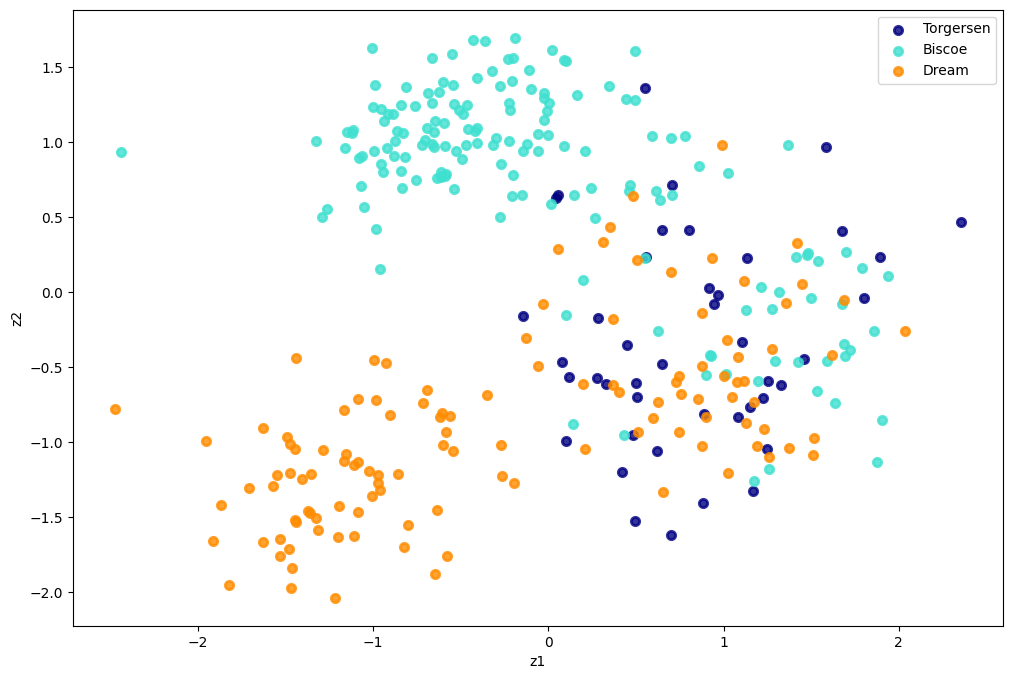

In [42]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X_sc)

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_cl):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

# Kernel PCA

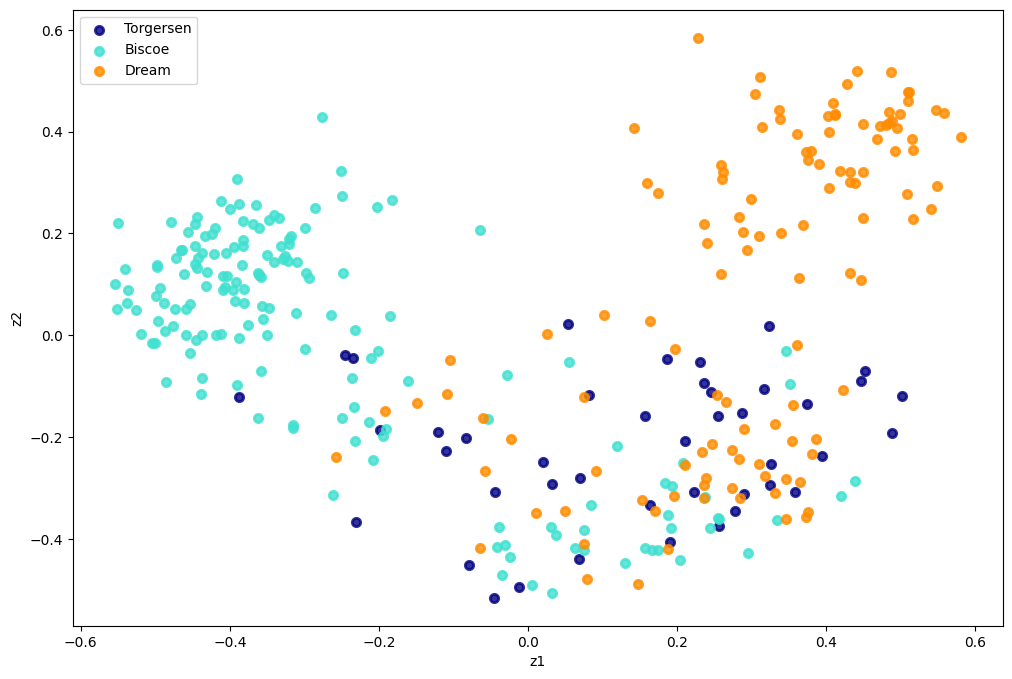

In [43]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X_sc)

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_cl):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

# TSNE

Initial Shape of X:  (325, 6)
New Shape of X:  (325, 2)
Kullback-Leibler divergence after optimization:  0.3611677885055542
No. of iterations:  999


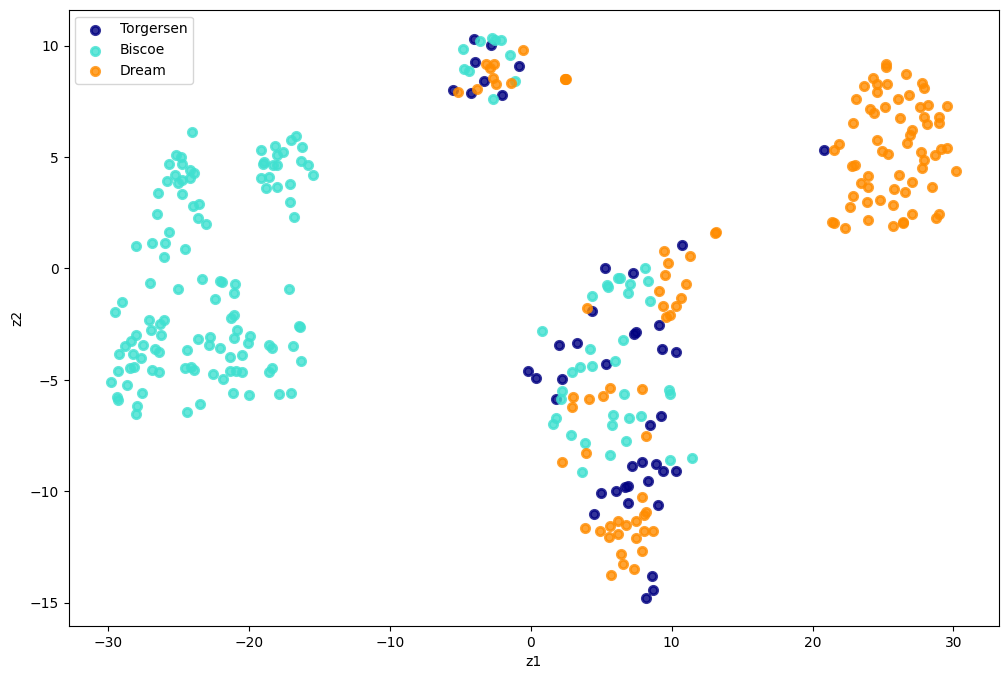

In [71]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X_sc)

# Вывод результатов
print('Initial Shape of X: ', X_sc.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_cl):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

# DBSCAN

In [73]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import v_measure_score

dbscan_cluster1 = DBSCAN(eps = 0.28, min_samples = 3)
X_new = dbscan_cluster1.fit(X_sc)

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Предполагаемое количество кластеров: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Расчетное количество точек шума: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Предполагаемое количество кластеров: 1
Расчетное количество точек шума: 322
v_measure = 0.012403362079463754


C:\Users\dima\AppData\Local\Temp\ipykernel_9528\1342095057.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best", shadow=False, scatterpoints=2)


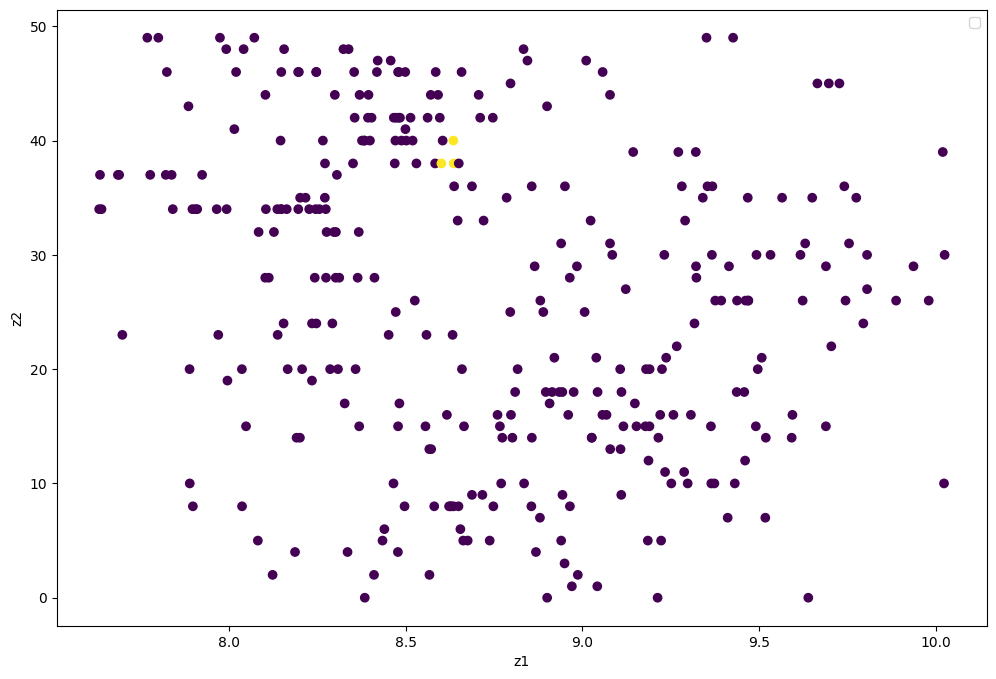

In [46]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

plt.scatter(
        X[cols_cl[0]], X[cols_cl[2]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Чтобы правильно опрделить число eps, воспользуемся правилом локтя.

In [47]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X_sc)

dists, inds = knn.kneighbors(X_sc)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

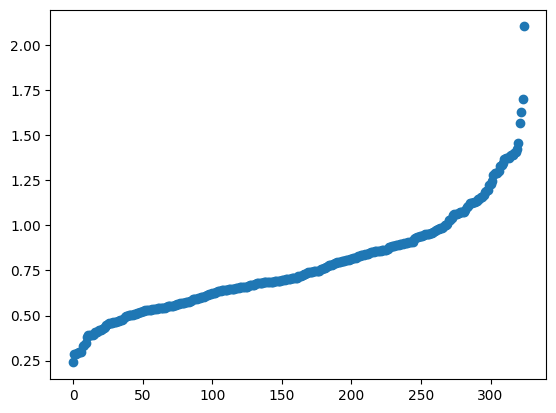

In [48]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

In [69]:
dbscan = DBSCAN(eps = 1.5, min_samples = min_samples)
print(dbscan)

pred = dbscan.fit_predict(X_sc)

# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Предполагаемое количество кластеров: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Расчетное количество точек шума: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

DBSCAN(eps=1.5, min_samples=3)
Предполагаемое количество кластеров: 2
Расчетное количество точек шума: 4
v_measure = 0.020262243770271356


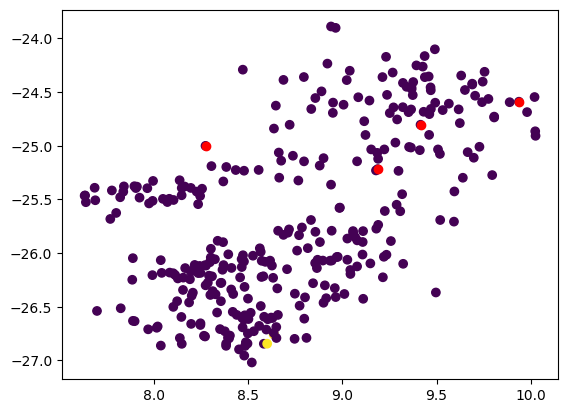

In [70]:
anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]
plt.scatter( X[cols_cl[0]], X[cols_cl[1]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols_cl[0]], values[cols_cl[1]], color='r')
plt.show()